# WEEK02

## 1、key audio features

参考https://huailiang.github.io/blog/2019/sound/

## 2、writing function to extract features

Deliverable: A Python script or notebook with well-documented code for each function and sample outputs.


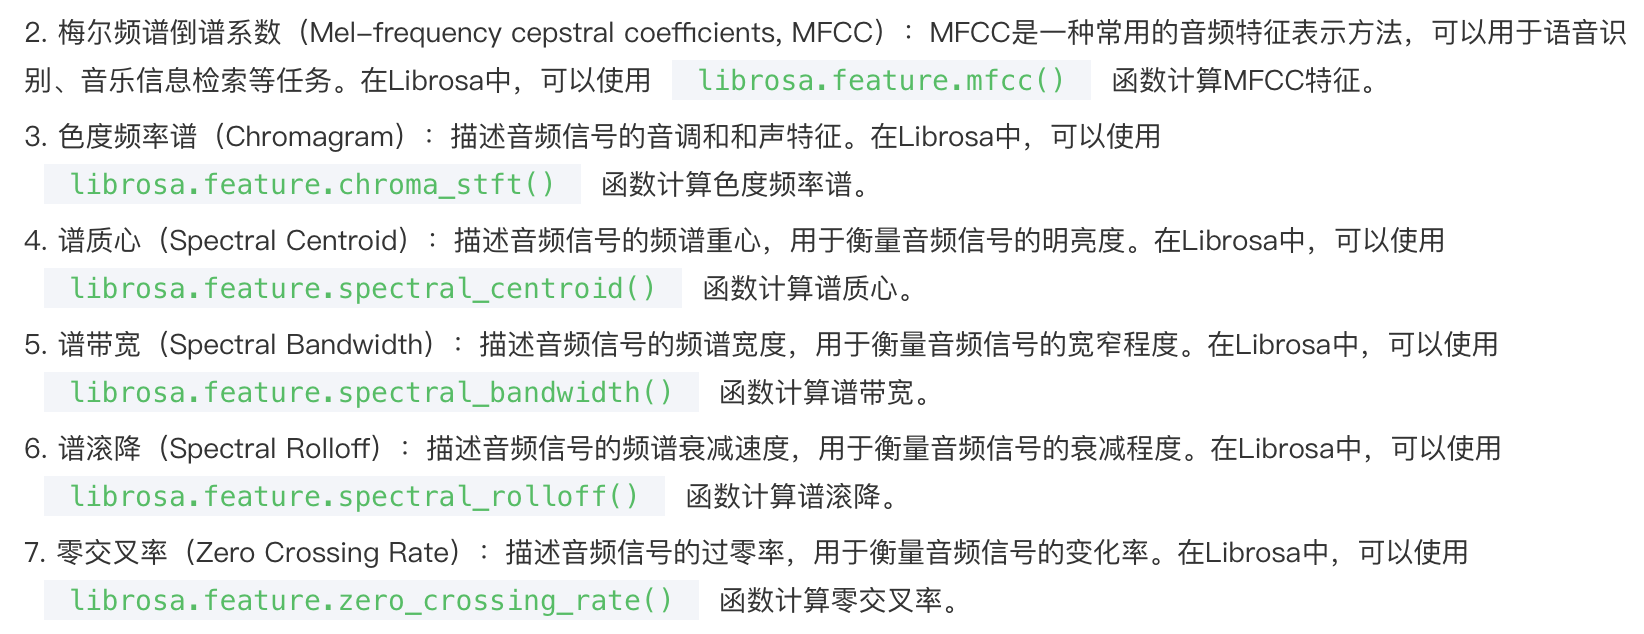

### 1.1 MFCCs
梅尔频率倒谱系数：一种表示声音的短期功率频谱的特征，常用于语音和说话者识别。

- 它通过将音频信号映射到梅尔频率标度，捕捉了音频的频谱包络。
- 返回一个 2D 的 NumPy 数组，形状为 (n_mfcc, t)。
  * n_mfcc：梅尔频率倒谱系数的数量（通常取 13 或 20），即每帧提取的 MFCC 系数数量。
  * t：时间帧的数量，即音频信号被分帧后对应的特征时间步。

In [22]:
def extract_mfcc(y,sr,n_mfcc=13):
    return librosa.feature.mfcc(y=y,sr=sr,n_mfcc=n_mfcc)
# n_mfcc‌：要提取的MFCC特征向量的维度数。这个参数决定了输出的MFCC特征的维度，通常设置为13或20‌

In [24]:
# 上传一段speech
import librosa
audio_path1='/Users/ninninghe/audioDL/audio_sample/speech_female.wav'
y1,sr1 = librosa.load(audio_path1)

In [26]:
# 提取MFCC的特征
mfccs=extract_mfcc(y1,sr1)
mfccs

array([[-5.98581055e+02, -5.80715088e+02, -5.78599609e+02, ...,
        -5.75377197e+02, -5.76741272e+02, -5.79258301e+02],
       [ 4.26852531e+01,  5.10483170e+01,  5.10914917e+01, ...,
         5.64937668e+01,  5.67701569e+01,  5.55927010e+01],
       [ 1.33760738e+01,  3.80040455e+00,  2.73750234e+00, ...,
         5.71280718e+00,  8.04770374e+00,  1.02822752e+01],
       ...,
       [-8.83566856e+00, -9.70997238e+00, -5.15958309e+00, ...,
        -1.23227654e+01, -1.09059515e+01, -8.22927094e+00],
       [-1.96893013e+00, -7.71094799e+00, -5.80340338e+00, ...,
        -1.85401428e+00, -3.03585458e+00, -1.43594193e+00],
       [ 5.06681323e-01, -5.04123545e+00, -9.51410294e+00, ...,
        -3.40280986e+00, -5.01636696e+00, -3.90437174e+00]], dtype=float32)

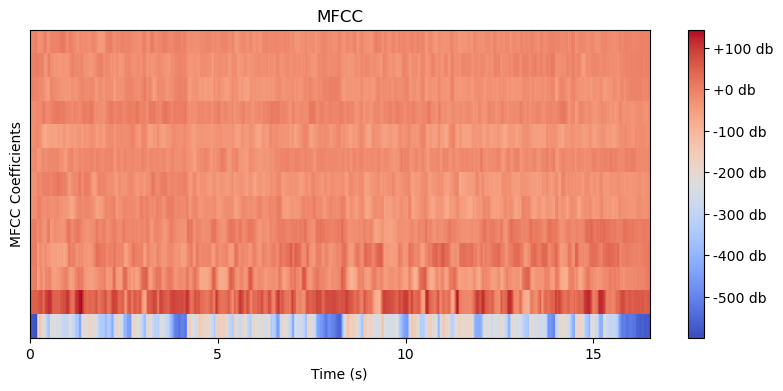

In [28]:
# 可视化MFCC特征
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f db')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

### 1.2 Chroma Features
色度特征：捕获音乐八度音阶中12个不同音高类（色度）的强度。

- 音乐信息检索中常用的特征，尤其适合分析和比较音高或调式相关的信息，通常用于音乐和音调声音分析
- 返回一个二维 NumPy 数组，表示 Chroma 特征矩阵，形状为 (12, t)：
  * 行数 (12)：每行对应一个音高类别（C、C#、D、D# 等共 12 个音符）。
  * 列数 (t)：每列对应一个时间帧，表示在该时间段内每个音高类别的强度。

In [30]:
def extract_chroma(y,sr):
    return librosa.feature.chroma_stft(y=y,sr=sr)

In [32]:
# 上传一段music
audio_path2='/Users/ninninghe/audioDL/audio_sample/music.wav'
y2,sr2=librosa.load(audio_path2)

In [34]:
# chroma
chroma = extract_chroma(y2,sr2)
chroma

array([[0.8093681 , 0.90068126, 0.9071419 , ..., 0.14610225, 0.0406431 ,
        0.03487224],
       [0.7831337 , 0.8808804 , 0.89211726, ..., 0.14189328, 0.03564656,
        0.03996067],
       [0.7477042 , 0.85845417, 0.8748228 , ..., 0.21713576, 0.03658855,
        0.09566545],
       ...,
       [0.65651083, 0.80043066, 0.6977663 , ..., 0.0053262 , 0.00559843,
        0.02979705],
       [0.9267859 , 0.87810546, 0.7961323 , ..., 0.01469059, 0.00987263,
        0.02936488],
       [1.        , 0.9712219 , 0.8539751 , ..., 0.07043562, 0.02397979,
        0.03143063]], dtype=float32)

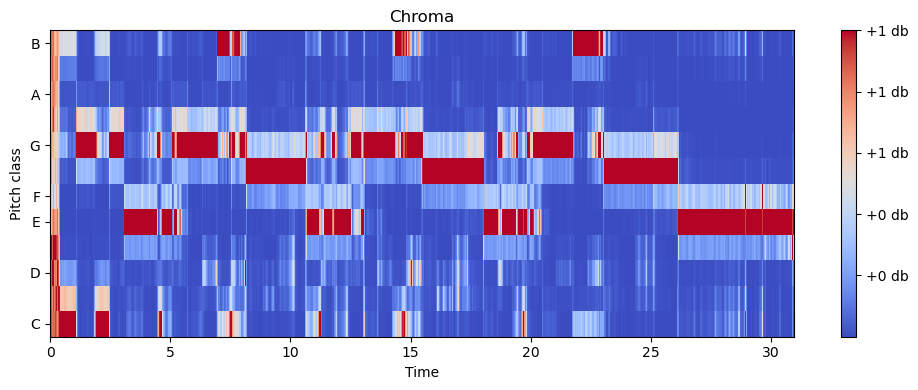

In [36]:
# chroma特征可视化
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma,sr=sr2,x_axis='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f db')
plt.title('Chroma')
plt.tight_layout() #用于自动调整子图（subplot）之间的间距，确保图形布局不重叠，使图形更加美观和可读。
plt.show()
# X 轴：时间（秒）。
# Y 轴：12 个音高类别（C、C#、D 等）。
# 颜色深浅：音高类别在该时间帧中的强度（深色表示强，浅色表示弱）。

### 1.3 Zero-Crossing Rate
过零率：信号波形从正变负的速率，用于区分有声和无声的声音。

- 过零率：是指信号中经过零值的次数，在音频分析中可用于检测信号的变化和音色特征。
- 高过零率通常表示高频噪声或无调性声音（如打击乐器的音频），低过零率则更多出现在有调性或平滑的音频中（如人声或乐器演奏的音符）。
- 对无周期性信号（如噪声）较高，对周期性信号（如语音、音乐）较低。

- 返回值：二维 NumPy 数组,形状为 (1, n_frames)：
	* 1：第一维表示单个特征值（即零交叉率）。
	* n_frames：第二维是帧的总数，表示每一帧的零交叉率。

In [44]:
def extract_zero_crossing_rate(y):
    return librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)
# y: 输入音频信号，是一个一维 numpy 数组（通常是从 librosa.load 中加载的音频数据）。
# frame_length: 帧的长度，表示每个计算窗口的样本数，默认为 2048。
# hop_length: 跳帧长度，定义每次移动多少样本，默认为 512。
# center: 是否将信号居中，以使计算窗口居中在当前帧，默认为 True。

In [145]:
# 上传一段speech
audio_path1='/Users/ninninghe/audioDL/audio_sample/speech_female.wav'
y1,sr1 = librosa.load(audio_path1)

In [147]:
# 计算过零率
zcr = extract_zero_crossing_rate(y1)
zcr

array([[0.03564453, 0.04931641, 0.06005859, 0.05322266, 0.05761719,
        0.06005859, 0.06347656, 0.06445312, 0.07275391, 0.10400391,
        0.12353516, 0.11865234, 0.11865234, 0.10546875, 0.09082031,
        0.1015625 , 0.08642578, 0.06347656, 0.04980469, 0.03369141,
        0.02636719, 0.02148438, 0.02832031, 0.03857422, 0.05371094,
        0.06884766, 0.078125  , 0.0859375 , 0.08300781, 0.08105469,
        0.07421875, 0.07128906, 0.0703125 , 0.06933594, 0.07080078,
        0.05957031, 0.05419922, 0.05029297, 0.04882812, 0.04785156,
        0.04248047, 0.03466797, 0.02539062, 0.03222656, 0.0390625 ,
        0.04541016, 0.05517578, 0.06494141, 0.07763672, 0.08056641,
        0.07958984, 0.06445312, 0.04785156, 0.03955078, 0.02929688,
        0.02441406, 0.02099609, 0.02294922, 0.02587891, 0.03759766,
        0.05029297, 0.06201172, 0.0859375 , 0.08984375, 0.09667969,
        0.1015625 , 0.08691406, 0.09130859, 0.08984375, 0.09912109,
        0.11425781, 0.12060547, 0.12255859, 0.10

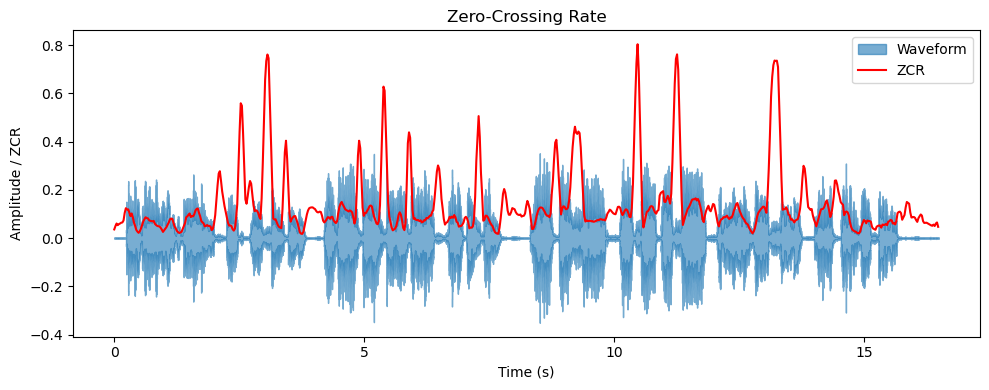

In [149]:
# 生成时间轴
frames = range(len(zcr[0]))
time = librosa.frames_to_time(frames, sr=sr1)

# 绘制波形和 ZCR
plt.figure(figsize=(10,4))
librosa.display.waveshow(y1, sr=sr1,alpha=0.6, label="Waveform")
plt.plot(time, zcr[0], color='r', label="ZCR")
plt.title("Zero-Crossing Rate")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / ZCR")
plt.legend()
plt.tight_layout()
plt.show()

### 1.4 Spectral Roll-Off
谱滚降：表示频谱能量的累积分布达到某个百分比的频率点。通常用于描述频谱中低频或高频成分的能量分布特性。

- 返回值为一个二维数组 rolloff：
  * 形状为 (1, n_frames)，其中 n_frames 是信号分帧后的帧数。
  * 每一列表示对应帧中频谱累积能量达到指定百分比 roll_percent 的频率（单位：赫兹）。

In [94]:
def extract_spectral_rolloff(y,sr,roll_percent=0.85):
    return librosa.feature.spectral_rolloff(y=y,sr=sr,roll_percent=roll_percent)
# roll_percent:指定能量百分比，用于计算频谱衰减率的位置。
# roll_percent默认值为 0.85，表示找到频谱中能量累积达到 85% 的频率点。

In [102]:
# 上传一段speech
audio_path3='/Users/ninninghe/audioDL/audio_sample/crying-baby.wav'
y3,sr3 = librosa.load(audio_path3)

In [121]:
#频谱衰减率
spectral_rolloff = extract_spectral_rolloff(y3,sr3,roll_percent=0.85)
spectral_rolloff

array([[3434.54589844, 3165.38085938, 3154.61425781, 3186.9140625 ,
        3692.94433594, 4791.13769531, 6072.36328125, 8193.38378906,
        8591.74804688, 8624.04785156, 8225.68359375, 7095.19042969,
        6147.72949219, 8376.41601562, 8957.8125    , 7870.38574219,
        6578.39355469, 7687.35351562, 7267.45605469, 6535.32714844,
        6470.72753906, 6169.26269531, 5727.83203125, 5630.93261719,
        5620.16601562, 5415.60058594, 5264.86816406, 5232.56835938,
        5598.6328125 , 5953.93066406, 5921.63085938, 5458.66699219,
        5458.66699219, 5501.73339844, 5770.8984375 , 5490.96679688,
        5426.3671875 , 5351.00097656, 5318.70117188, 5307.93457031,
        5211.03515625, 5275.63476562, 4995.703125  , 3736.01074219,
        5673.99902344, 5189.50195312, 5221.80175781, 8204.15039062,
        8365.64941406, 7396.65527344, 6050.83007812, 7515.08789062,
        7967.28515625, 8344.11621094, 7956.51855469, 4898.80371094,
        3972.87597656, 4866.50390625, 5577.09960

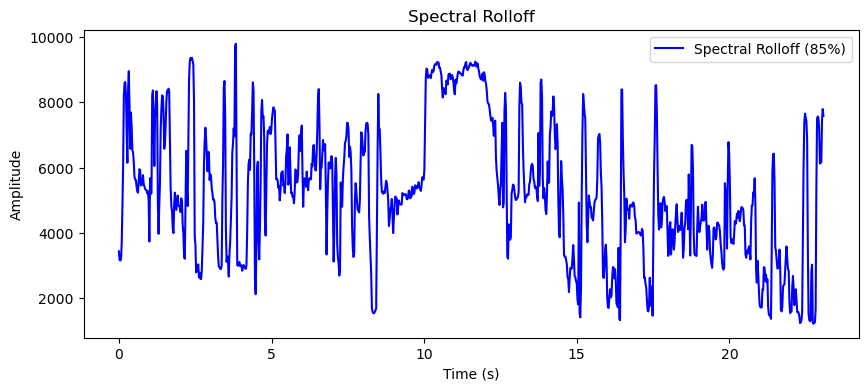

In [125]:
# 时间轴
frames = range(spectral_rolloff.shape[1])
time3 = librosa.frames_to_time(frames, sr=sr3)

# 绘制频谱衰减率曲线
plt.figure(figsize=(10, 4))
plt.title('Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time3, spectral_rolloff[0], color='b', label='Spectral Rolloff (85%)')
plt.legend(loc='upper right')
plt.show()

（1）可视化是否正确？
    曲线的上升表示高频成分变多（声音更尖锐）。
	曲线的下降表示低频成分占主导（声音更低沉）。

### 1.5 spectral Centroid
频谱质心和带宽：频谱的“质心”和宽度，可帮助区分不同类型的声音。

- 频谱质心表示频率分布的“重心”，通常描述音频信号的频率特性，即可用来衡量声音的“亮度”或“尖锐度”。
- 高频谱质心表示信号中高频成分占主导，低频谱质心则表示信号以低频成分为主。
- 返回一个二维数组 centroid：
  * 形状为 (1, n_frames)，其中 n_frames 是信号被分成的帧数。
  * 每列代表每帧的频谱质心值（以赫兹为单位）。

In [141]:
def extract_spectral_centroid(y,sr):
    return librosa.feature.spectral_centroid(y=y,sr=sr)

In [151]:
# 计算频谱质心，样本是sppech_female
spectral_centroids = librosa.feature.spectral_centroid(y=y1, sr=sr1)
spectral_centroids

array([[2486.58368839, 2215.4878302 , 2082.59305634, 2033.57287161,
        1913.37921932, 1913.16812134, 1799.3037007 , 1481.44331539,
        1522.00751025, 2916.7580765 , 2937.38137097, 2729.09392289,
        2487.16537454, 2529.89732014, 2797.30329112, 2704.29264535,
        2484.49453107, 2031.3892351 , 1680.23881697, 1401.9293826 ,
        1178.22419836, 1139.05175582, 1439.13205482, 1696.4341159 ,
        1907.88385629, 2059.11320455, 2171.08285178, 2285.56429649,
        2352.18615437, 2387.00220667, 2319.24850363, 2461.29114471,
        2448.96155137, 2605.97173139, 2668.20893347, 2286.98448644,
        2052.19557432, 2087.29265379, 2090.9499865 , 2225.5762154 ,
        2380.14801906, 2133.71443515, 1600.39612082, 1317.23088882,
        1736.42499724, 2051.87245786, 2183.08062862, 2340.26264345,
        2667.56427388, 2909.85114204, 2687.8744272 , 2342.95682389,
        1906.88442039, 1660.21477138, 1816.9312921 , 1766.28832859,
        1392.71367975, 1087.47159793, 1158.86478

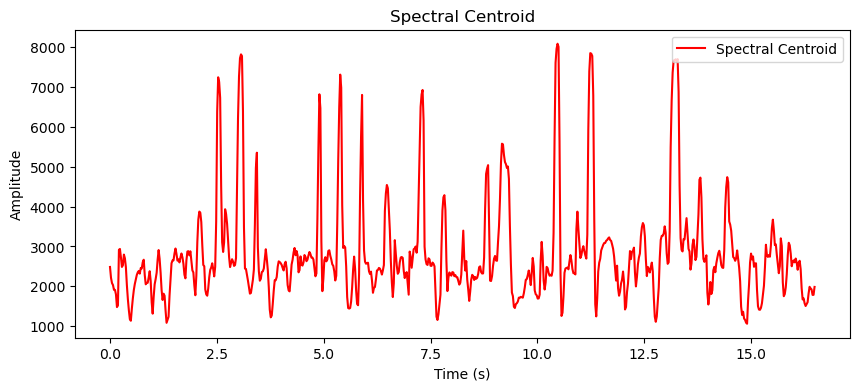

In [153]:
# 时间轴
frames = range(spectral_centroids.shape[1]) # 获取频谱质心结果的帧索引
# spectral_centroids[0]：频谱质心的第一维数据（每帧一个值）
t = librosa.frames_to_time(frames, sr=sr1) # 将帧索引转换为时间值

# 绘制频谱质心
plt.figure(figsize=(10, 4))
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t, spectral_centroids[0], color='r', label='Spectral Centroid') # spectral_centroids[0]：频谱质心的第一维数据（每帧一个值）
plt.legend(loc='upper right') # 将图例放置在图形的右上角
plt.show()

### 1.6 spectral Bandwidth
频谱质心和带宽：频谱的“质心”和宽度，可帮助区分不同类型的声音。

- 频谱带宽表示信号频谱的宽度，描述了频谱中高频和低频分量的扩展程度。
- 较宽的频谱带宽表示信号中包含更多的高频成分。
- 形状为 (1, n_frames)，其中 n_frames 是信号被分帧后的帧数。
  * 每一列表示对应帧的频谱带宽值（单位：赫兹）。
  * 值越大，表示高频分量更多，信号更复杂；值越小，表示频率分布更集中。

In [155]:
def extract_spectral_bandwidth(y,sr):
    return librosa.feature.spectral_bandwidth(y=y,sr=sr)

In [157]:
# 计算频谱带宽,样本是sppech_female
spectral_bandwidth = extract_spectral_bandwidth(y1,sr1)
spectral_bandwidth

array([[2721.54101681, 2632.8203132 , 2531.44924273, 2456.27272044,
        2365.26268915, 2308.25534708, 2215.90835094, 1899.61951507,
        1852.6825813 , 2592.74166712, 2649.53825078, 2727.94991971,
        2856.6975255 , 2890.55906172, 2834.47859015, 2747.90153991,
        2643.74132828, 2381.57244956, 2198.59814777, 2195.85419377,
        2165.50616176, 2167.22879801, 2501.29559394, 2538.72820157,
        2420.85695064, 2395.53319465, 2447.76915296, 2551.11232051,
        2519.67567886, 2538.16577498, 2612.37774158, 2719.878979  ,
        2735.77833746, 2831.48847451, 2867.82619715, 2718.92325078,
        2598.58339963, 2715.97824673, 2799.31402258, 2957.71904116,
        3136.08803124, 3087.69410936, 2631.62728737, 2326.01179023,
        2263.57716894, 2238.65876324, 2268.25001504, 2449.54083668,
        2647.64663736, 2766.95013796, 2745.22267374, 2780.04355569,
        2662.73418548, 2516.98926054, 2817.27205878, 2907.1642025 ,
        2576.90929682, 1942.73098553, 1918.66166

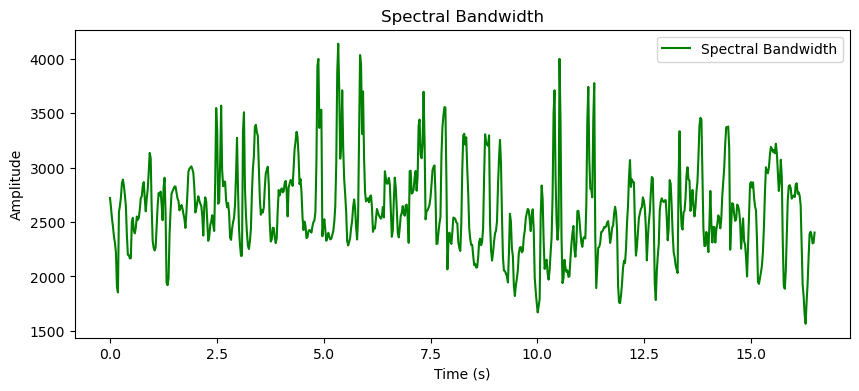

In [159]:
# 时间轴
frames = range(spectral_bandwidth.shape[1])
t = librosa.frames_to_time(frames, sr=sr1)

# 绘制频谱带宽曲线
plt.figure(figsize=(10, 4))
plt.title('Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t, spectral_bandwidth[0], color='g', label='Spectral Bandwidth')
plt.legend(loc='upper right')
plt.show()

## 3、exploring and analyzing feature differences

### 3.1 Dataset
prepare a small dataset with different types of sounds

In [ ]:
# music
music_path='/Users/ninninghe/audioDL/Everyweek_Task/audio_sample/music.wav'
y_m,sr_m=librosa.load(music_path)

# nonspeech
nonspeech_path='/Users/ninninghe/audioDL/Everyweek_Task/audio_sample/non-speech.wav'
y_ns,sr_ns=librosa.load(nonspeech_path)

# speech
speech_path='/Users/ninninghe/audioDL/Everyweek_Task/audio_sample/speech.wav'
y_s,sr_s=librosa.load(speech_path)

# female speech
female_path='/Users/ninninghe/audioDL/Everyweek_Task/audio_sample/female_speech.wav'
y_fs,sr_fs=librosa.load(female_path)

# male speech
male_path='/Users/ninninghe/audioDL/Everyweek_Task/audio_sample/male_speech.wav'
y_ms,sr_ms=librosa.load(male_path)

### 3.2 use the feature extraction functions and observe their differents 

#### 3.2.1 compare MFCCs for male vs. female speech and note and differences

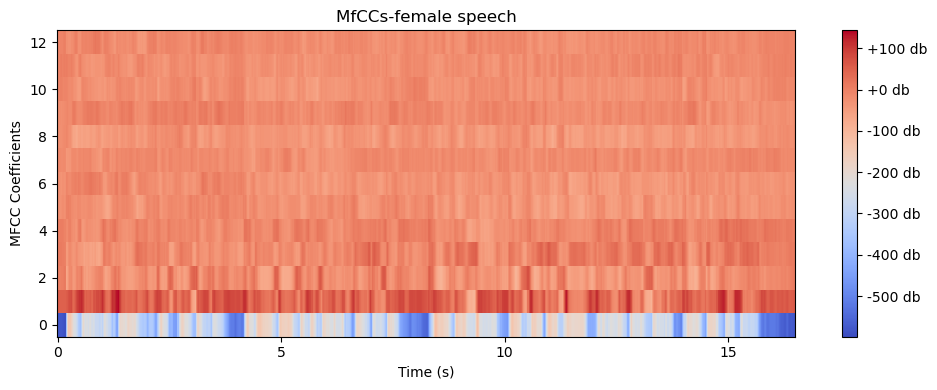

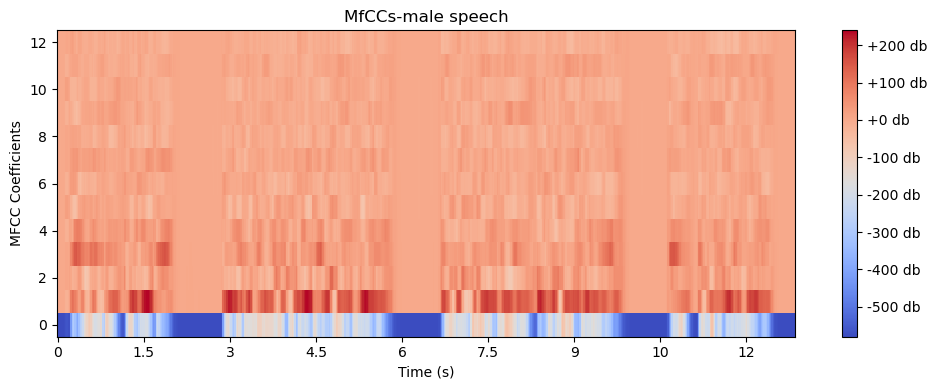

In [43]:
import librosa
import matplotlib.pyplot as plt
# 上传音频
female_path='/Users/ninninghe/audioDL/audio_sample/15audio/speech_female.wav'
y_sf,sr_sf=librosa.load(female_path)

male_path='/Users/ninninghe/audioDL/audio_sample/15audio/speech_male.wav'
y_sm,sr_sm=librosa.load(male_path)

# 提取 MFCC 特征
mfcc_sf = librosa.feature.mfcc(y=y_sf,sr=sr_sf,n_mfcc=13)
mfcc_sm = librosa.feature.mfcc(y=y_sm,sr=sr_sm,n_mfcc=13)

# 可视化MFCC特征
# female_speech MFCC
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc_sf,sr=sr_sf,x_axis='time',y_axis='frames') #y_axis='frames'代表y轴刻度为mfcc特征的维度
plt.colorbar(format='%+2.0f db')
plt.title('MfCCs-female speech')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# male_speech MFCC
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc_sm,sr=sr_sm,x_axis='time',y_axis='frames')
plt.colorbar(format='%+2.0f db')
plt.title('MfCCs-male speech')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients') 
plt.tight_layout()
plt.show()

##### 3.2.1.1 female speech
###### (1)频谱份量：
- 图中上方红色部分，即高频份量更显著，图中下方蓝色部分,即低频份量明显较少
- 说明女性语音的高频成分占主导，符合女性语音高基频的特点。
###### (2)波动幅度
- 在时间轴上可以观察到更多的动态变化，尤其是在高频部分。这可能是因为女性的语音中音高变化更频繁，导致 MFCC 特征随时间的波动更明显。
###### (3)mfcc系数
- 低阶 MFCC 系数的能量较弱（低频部分以蓝色为主），说明女性语音中低频成分相对较少。
- 高阶 MFCC 系数能量更高（高频部分红色更为显著），表明女性语音在高频段的细节特征更加突出。

##### 3.2.1.2 male speech
###### (1)频谱能量
- 图中下方蓝色部分可看到低频份量更显著
- 说明男性语音的低频成分占主导,符合男性语音低基频的特性。
###### (2)波动幅度
- 在时间轴上整体更平稳，特征变化较少。这符合男性语音通常较为低沉、平稳的特点。
###### (3)mfcc系数
- 低阶 MFCC 系数的能量较强（低频部分以红色为主），说明男性语音中低频成分更显著。
- 高阶 MFCC 系数能量较低（高频部分颜色较浅），表明男性语音在高频段的特征不如女性显著。

##### Summary：女性语音高频成分主导，高频MFCC系数较大，MFCC波动幅度更大，语音时间变化更强烈

#### 3.2.2 observe the zero-crossing rate for speech vs.background(non-speech) noise

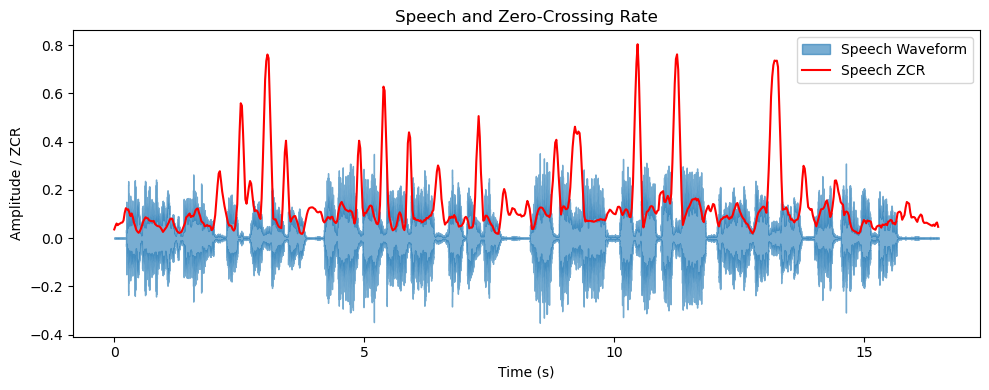

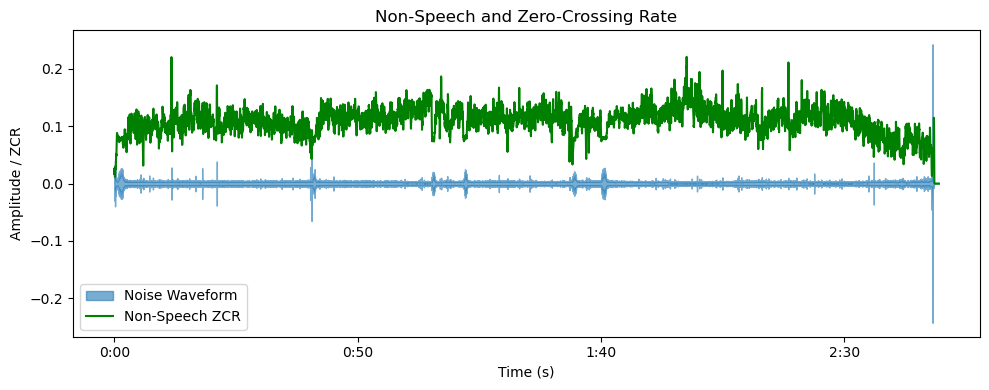

In [47]:
# 上传音频
speech_path='/Users/ninninghe/audioDL/audio_sample/15audio/speech_female.wav'
y_s,sr_s=librosa.load(speech_path)

nonspeech_path='/Users/ninninghe/audioDL/audio_sample/15audio/non-speech.wav'
y_ns,sr_ns=librosa.load(nonspeech_path)

# 提取过零率
zcr_s = librosa.feature.zero_crossing_rate(y_s, frame_length=2048, hop_length=512, center=True)
zcr_ns = librosa.feature.zero_crossing_rate(y_ns, frame_length=2048, hop_length=512, center=True)

# 时间轴转换
speech_frames = range(len(zcr_s[0]))
speech_time = librosa.frames_to_time(speech_frames, sr=sr_s)

nonspeech_frames = range(len(zcr_ns[0]))
nonspeech_time = librosa.frames_to_time(nonspeech_frames, sr=sr_ns)

# 绘制语音的波形和 ZCR
plt.figure(figsize=(10,4))
librosa.display.waveshow(y_s, sr=sr_s, alpha=0.6, label="Speech Waveform")
plt.plot(speech_time, zcr_s[0], color='r', label="Speech ZCR")
plt.title("Speech and Zero-Crossing Rate")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / ZCR")
plt.legend()
plt.tight_layout()
plt.show()

# 绘制背景噪声的波形和 ZCR
plt.figure(figsize=(10,4))
librosa.display.waveshow(y_ns, sr=sr_ns, alpha=0.6, label="Noise Waveform")
plt.plot(nonspeech_time, zcr_ns[0], color='g', label="Non-Speech ZCR")
plt.title("Non-Speech and Zero-Crossing Rate")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / ZCR")
plt.legend()
plt.tight_layout()
plt.show()

##### Summary：speech的过零率远离0线更远？

#### 3.3.3 analyze spectral roll-off for music vs. speech

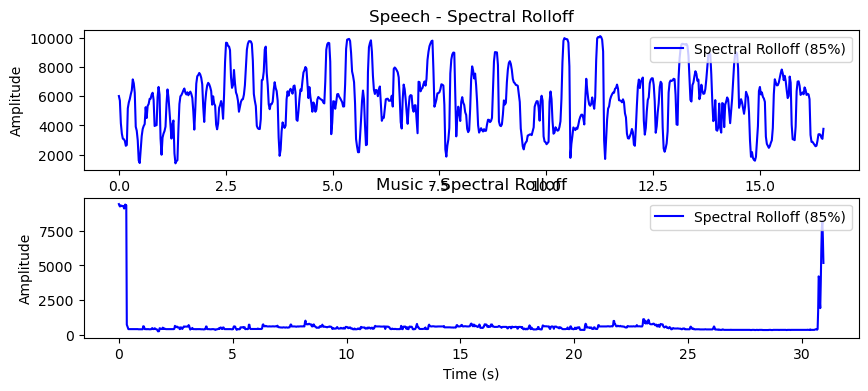

In [7]:
import librosa
import matplotlib.pyplot as plt
# 上传音频
speech_path='/Users/ninninghe/audioDL/audio_sample/15audio/speech_female.wav'
y_s,sr_s=librosa.load(speech_path)

music_path='/Users/ninninghe/audioDL/audio_sample/15audio/music.wav'
y_m,sr_m=librosa.load(music_path)

# 计算谱降率
spr_s=librosa.feature.spectral_rolloff(y=y_s,sr=sr_s,roll_percent=0.85)
spr_m=librosa.feature.spectral_rolloff(y=y_m,sr=sr_m,roll_percent=0.85)

# 时间轴
frames_s = range(spr_s.shape[1])
t_s = librosa.frames_to_time(frames_s, sr=sr_s) #将帧转换成时间

frames_m = range(spr_m.shape[1])
t_m = librosa.frames_to_time(frames_m, sr=sr_m)

# 绘制频谱衰减率曲线
plt.figure(figsize=(10, 4))

plt.subplot(2,1,1)
plt.title('Speech - Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t_s, spr_s[0], color='b', label='Spectral Rolloff (85%)')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.title('Music - Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t_m, spr_m[0], color='b', label='Spectral Rolloff (85%)')
plt.legend(loc='upper right')

plt.show()

##### 3.3.3.1 Speech
- 振幅波动剧烈，变化明显，显示语音信号的频率和能量在短时间内变化较快。
- 低频和高频动态范围较大。
- 在speech中，通常集中在低频区域，因此谱滚降随人的声音变化而快速变化。

##### 3.3.3.2 Music
- 振幅变化平稳：时间轴上的振幅大部分时间几乎保持恒定，仅在信号开始和结束时有较大变化。
- 低频成分主导：音乐信号在大部分时间内保持低频能量，导致谱滚降曲线相对稳定且贴近低值。
- 结束时突然变化：谱滚降在图像右端（30 秒附近）急剧上升，这可能对应于音乐信号的高频部分突然增强。
- 音乐信号通常包含较为稳定的频率分量（例如低频伴奏），高频成分较少，这导致谱滚降整体较低且平稳。

##### Summary：speech的spectral rolloff rate波动更加剧烈，高频与低频的变化更加明显，而music相反

## 4、Practice Exercise:Extract Features from 20 Audio Files and Analyze

- 提取6个特征
- 计算每种特征的均值和标准差
- 使用散点图或者箱线图，显示每种特征在不同声音类别的取值范围
- 分析每种特征在不同类别之间的差异

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import pandas as pd

# audio files
audio_files=['/Users/ninninghe/audioDL/audio_sample/angry.wav',
                '/Users/ninninghe/audioDL/audio_sample/crying-baby.wav',
                '/Users/ninninghe/audioDL/audio_sample/female_laughing.wav',
                '/Users/ninninghe/audioDL/audio_sample/shouting.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_female.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_male.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_robots.wav',
                '/Users/ninninghe/audioDL/audio_sample/talk_female.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech-man.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech-universe.wav',
                '/Users/ninninghe/audioDL/audio_sample/guitar.wav',
                '/Users/ninninghe/audioDL/audio_sample/industrial-gas-valve-release.wav',
                '/Users/ninninghe/audioDL/audio_sample/metals.wav',
                '/Users/ninninghe/audioDL/audio_sample/music.wav',
                '/Users/ninninghe/audioDL/audio_sample/non-speech.wav',
                '/Users/ninninghe/audioDL/audio_sample/playground.wav',
                '/Users/ninninghe/audioDL/audio_sample/shoes-in-snow.wav',
                '/Users/ninninghe/audioDL/audio_sample/train_noise.wav',
                '/Users/ninninghe/audioDL/audio_sample/background.wav',
                '/Users/ninninghe/audioDL/audio_sample/industry_wave.wav',]

# 2、特征提取
def extract_features(files_path):
    y,sr = librosa.load(files_path,sr=None)
    mfccs = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13) 
    zero_crossing = librosa.feature.zero_crossing_rate(y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    ## 使用特征的均值和标准差作为输入
    features = {
        'mfcc_mean':np.mean(mfccs,axis=1).tolist(),
        'mfcc_std':np.std(mfccs,axis=1).tolist(),
        'zero_crossing_mean':np.mean(zero_crossing),
        'zero_crossing_std':np.std(zero_crossing),
        'spectral_rolloff_mean':np.mean(spectral_rolloff),
        'spectral_rolloff_std':np.std(spectral_rolloff),
        'spectral_centroid_mean':np.mean(spectral_centroid),
        'spectral_centroid_std':np.std(spectral_centroid),
        'spectral_bandwidth_mean':np.mean(spectral_bandwidth),
        'spectral_bandwidth_std':np.std(spectral_bandwidth),
        'chroma_mean':np.mean(chroma),
        'chroma_std':np.std(chroma)
    }
    return features

features

## 5、implement a basic classifilcation task using extracted features to distinguish between speech and non-speech sounds

- 数据集准备：选择或创建一个数据集，包括10个语音样本和10个非语音样本。可以使用公开的数据集（如 UrbanSound8K、ESC-50）或者你自己的音频文件。

- 特征提取：使用这些特征的均值和标准差作为输入特征。
  * MFCCs（梅尔频率倒谱系数）：捕获频谱特性。
  * 零交叉率（Zero-Crossing Rate）：衡量信号通过零值的次数。
  * 频谱滚降（Spectral Roll-Off）：指频率能量总和的某一百分比以下的频率。

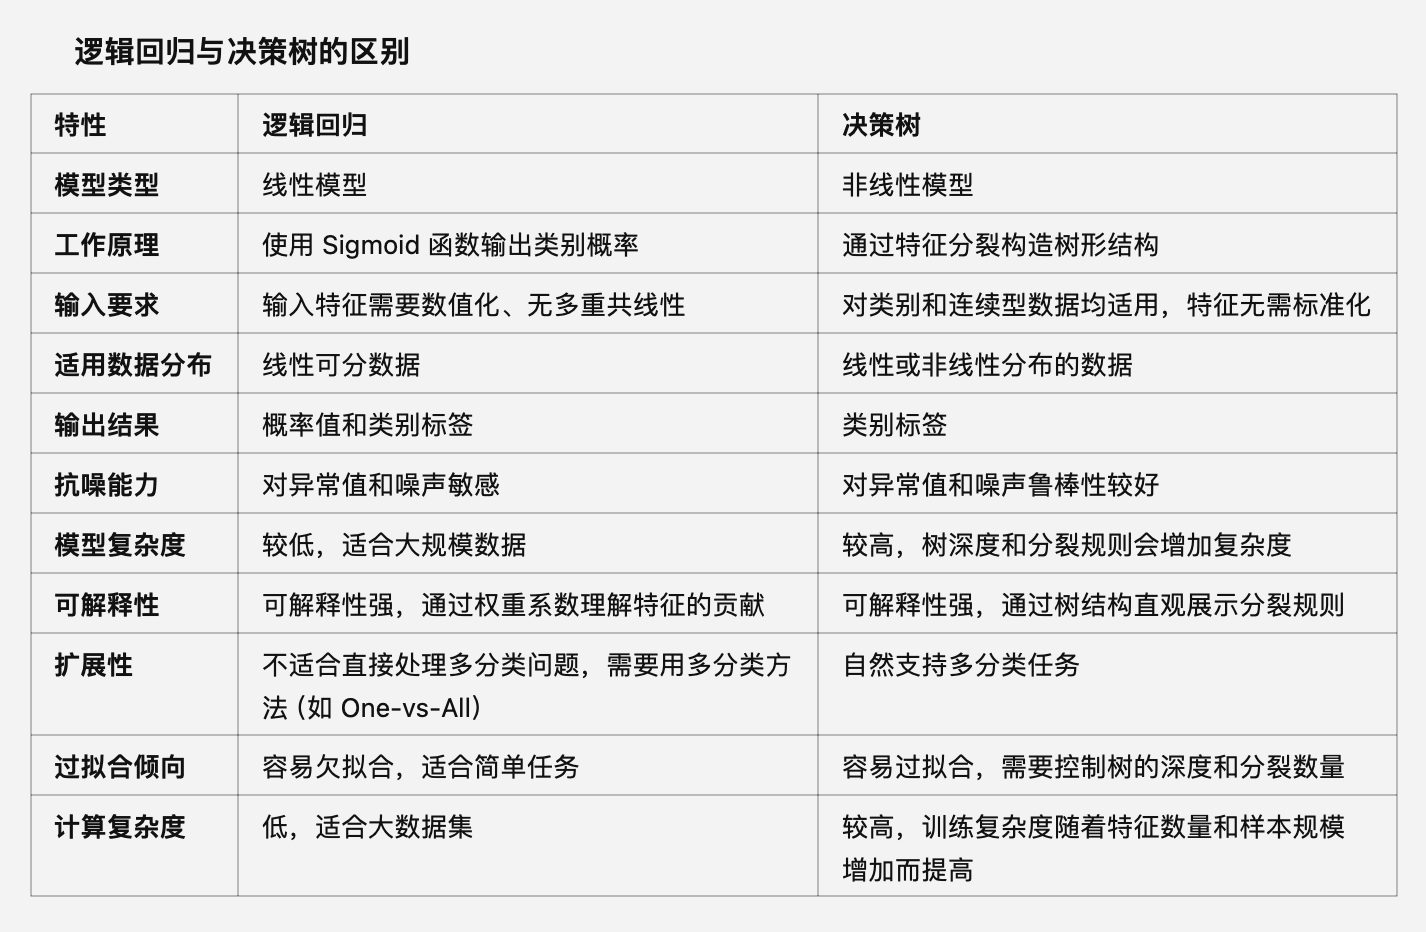

In [17]:
import os # 用于文件路径操作
import librosa
import librosa.display
import numpy as np
import pandas as pd
# sklearn：提供机器学习模型（逻辑回归、决策树）和评估工具
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1、数据集准备
speech_files = ['/Users/ninninghe/audioDL/audio_sample/angry.wav',
                '/Users/ninninghe/audioDL/audio_sample/crying-baby.wav',
                '/Users/ninninghe/audioDL/audio_sample/female_laughing.wav',
                '/Users/ninninghe/audioDL/audio_sample/shouting.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_female.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_male.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech_robots.wav',
                '/Users/ninninghe/audioDL/audio_sample/talk_female.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech-man.wav',
                '/Users/ninninghe/audioDL/audio_sample/speech-universe.wav',]
non_speech_files = ['/Users/ninninghe/audioDL/audio_sample/guitar.wav',
                '/Users/ninninghe/audioDL/audio_sample/industrial-gas-valve-release.wav',
                '/Users/ninninghe/audioDL/audio_sample/metals.wav',
                '/Users/ninninghe/audioDL/audio_sample/music.wav',
                '/Users/ninninghe/audioDL/audio_sample/non-speech.wav',
                '/Users/ninninghe/audioDL/audio_sample/playground.wav',
                '/Users/ninninghe/audioDL/audio_sample/shoes-in-snow.wav',
                '/Users/ninninghe/audioDL/audio_sample/train_noise.wav',
                '/Users/ninninghe/audioDL/audio_sample/background.wav',
                '/Users/ninninghe/audioDL/audio_sample/industry_wave.wav',]

## 合并标签（1：speech 0: non-speech）
files_path = speech_files + non_speech_files
labels = [1] * len(speech_files) + [0] * len(non_speech_files)

# 2、特征提取
def extract_features(files_path):
    y,sr = librosa.load(files_path,sr=None)
    mfccs = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13) # 捕获频谱特性
    zero_crossing = librosa.feature.zero_crossing_rate(y) # 衡量信号的噪声性质
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr) # 区分高频低频

    ## 使用特征的均值和标准差作为输入
    features = {
        'mfcc_mean':np.mean(mfccs,axis=1).tolist(),
        'mfcc_std':np.std(mfccs,axis=1).tolist(),
        'zero_crossing_mean':np.mean(zero_crossing),
        'zero_crossing_std':np.std(zero_crossing),
        'spectral_rolloff_mean':np.mean(spectral_rolloff),
        'spectral_rolloff_std':np.std(spectral_rolloff)
    }
    return features

## 提取所有文件的特征
data = []
for i,file in enumerate(files_path): # enumerate,在迭代一个可迭代对象的同时生成一个索引值。
    features = extract_features(file) # 提取所有文件的特征
    features['label'] = labels[i] # 将特征添加到字典，并附上标签（即speech为1，nonspeech为0）
    data.append(features)

## 将特征转换为表格格式
df = pd.DataFrame(data)

## 展开mfcc特征
df = pd.concat([df.drop(['mfcc_mean', 'mfcc_std'], axis=1),  # 将MFCC展开成单独的列
                pd.DataFrame(df["mfcc_mean"].to_list(), columns=[f"mfcc_mean_{i}" for i in range(13)]),
                pd.DataFrame(df["mfcc_std"].to_list(), columns=[f"mfcc_std_{i}" for i in range(13)])], axis=1)

# 3、构建分类器
## # 将数据分为训练集和测试集
x = df.drop('label',axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 4、评估模型
## 逻辑回归分类器、评估
logreg = LogisticRegression(max_iter=500) # 默认的最大迭代次数 max_iter 太小，模型在当前迭代次数内无法找到最佳解,将最大迭代次数增加到500
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'逻辑回归分类准确率: {accuracy:.2f}')

## 决策树分类器、评估
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'决策树分类准确率: {accuracy:.2f}')

逻辑回归分类准确率: 0.50
决策树分类准确率: 0.83
